# Smooth Collab Invariance

## Intro
* **Date**: 1/5/2021
* **What**: This is a network that's build kinda like the collaborative autoencoder I built back in October.  That experiment is under RQI if you're interested.  The basic idea here is that the network needs to learn what should and more importantly, what *shouldn't* activate the invariant neurons.
* **Why**: Because I want the invariant layer to work.
* **Hopes**: I just want to see something smooth, dammit.
* **Limitations**: It really seems like the invariant layer really, *really* doesn't want to work.  I'm sure my network will find a way to ensure it doesn't.  I'm not bitter.

## Code

In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tensorflow.keras.datasets import mnist
from tqdm import tqdm

(x_tr, _), _ = mnist.load_data()

x_tr = x_tr / 255.0

t_sl = 30 # Tapestry side length
m_sl = 28 # Side length of each images

tapestry = np.zeros((t_sl * m_sl, t_sl * m_sl))

x_i = 3000

for x in range(t_sl):
    for y in range(t_sl):

        tapestry[y * m_sl : (y + 1) * m_sl, x * m_sl : (x + 1) * m_sl] = x_tr[x_i]
        x_i += 1
        
tapestry[(t_sl - 1) * m_sl:, :] = tapestry[: m_sl, :]
tapestry[:, (t_sl - 1) * m_sl:] = tapestry[:, : m_sl]

def draw_weights(w, Kx, Ky, s_len, fig):
    tapestry = np.zeros((s_len * Ky, s_len * Kx))
    
    w_i = 0
    for y in range(Ky):
        for x in range(Kx):
            tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len)
            w_i += 1
            
    plt.clf()        
    max_val = np.max(tapestry)
    im = plt.imshow(tapestry, cmap="Greys", vmax=max_val)
    fig.colorbar(im, ticks=[0, max_val])
    plt.axis("off")
    fig.canvas.draw()

In [2]:
def draw_weights_no_colorbar(w, Kx, Ky, s_len):
    tapestry = np.zeros((s_len * Ky, s_len * Kx))
    
    w_i = 0
    for y in range(Ky):
        for x in range(Kx):
            tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len)
            w_i += 1
            
    plt.clf()        
    max_val = np.max(tapestry)
    im = plt.imshow(tapestry, cmap="Greys", vmax=max_val)

In [3]:
x_o = 420
y_o = 420

sl = 20

x = x_o
y = y_o

v_x = 0
v_y = 0

v_max = 3

a_x = np.random.uniform(-1, 1)
a_y = np.random.uniform(-1, 1)

img_count = 100_000
imgs = []

del_t = 1

for i in range(img_count):
    if i % 20 == 0:
        a_x = np.random.uniform(-1, 1)
        a_y = np.random.uniform(-1, 1)
        
    x += v_x * del_t
    y += v_y * del_t
    v_x = np.clip(v_x + (a_x * del_t), -v_max, v_max)
    v_y = np.clip(v_y + (a_y * del_t), -v_max, v_max)
    
    x_f = int(x) % ((t_sl - 1) * m_sl)
    y_f = int(y) % ((t_sl - 1) * m_sl)
    
    imgs.append(tapestry[y_f: y_f + sl, x_f : x_f + sl])
    
img_array = np.array(imgs)
ts_data = img_array.reshape(-1, sl ** 2)
gp_data = cp.asarray(ts_data)

<IPython.core.display.Javascript object>


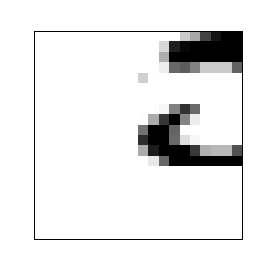

In [4]:
%matplotlib notebook
fig = plt.figure(figsize=(3, 3))

ims = []
for i in range(500):
    im = plt.imshow(imgs[i], cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
tap_val = np.zeros((t_sl * m_sl, t_sl * m_sl))

x_i = 10000

for x in range(t_sl):
    for y in range(t_sl):

        tap_val[y * m_sl : (y + 1) * m_sl, x * m_sl : (x + 1) * m_sl] = x_tr[x_i]
        x_i += 1
        
tap_val[(t_sl - 1) * m_sl:, :] = tap_val[: m_sl, :]
tap_val[:, (t_sl - 1) * m_sl:] = tap_val[:, : m_sl]

In [6]:
x_o = 420
y_o = 420

sl = 20

x = x_o
y = y_o

v_x = 0
v_y = 0

v_max = 3

a_x = np.random.uniform(-1, 1)
a_y = np.random.uniform(-1, 1)

img_count = 10_000
imgs = []

del_t = 1

for i in range(img_count):
    if i % 20 == 0:
        a_x = np.random.uniform(-1, 1)
        a_y = np.random.uniform(-1, 1)
        
    x += v_x * del_t
    y += v_y * del_t
    v_x = np.clip(v_x + (a_x * del_t), -v_max, v_max)
    v_y = np.clip(v_y + (a_y * del_t), -v_max, v_max)
    
    x_f = int(x) % ((t_sl - 1) * m_sl)
    y_f = int(y) % ((t_sl - 1) * m_sl)
    
    imgs.append(tapestry[y_f: y_f + sl, x_f : x_f + sl])
    
img_array = np.array(imgs)
ts_val = img_array.reshape(-1, sl ** 2)
gp_val = cp.asarray(ts_data)

<IPython.core.display.Javascript object>


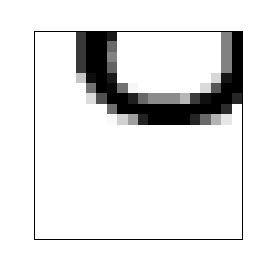

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(3, 3))

ims = []
for i in range(500):
    im = plt.imshow(imgs[i], cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])
plt.show()

## Analysis Dialog

Let's get this bread, baby.

<IPython.core.display.Javascript object>


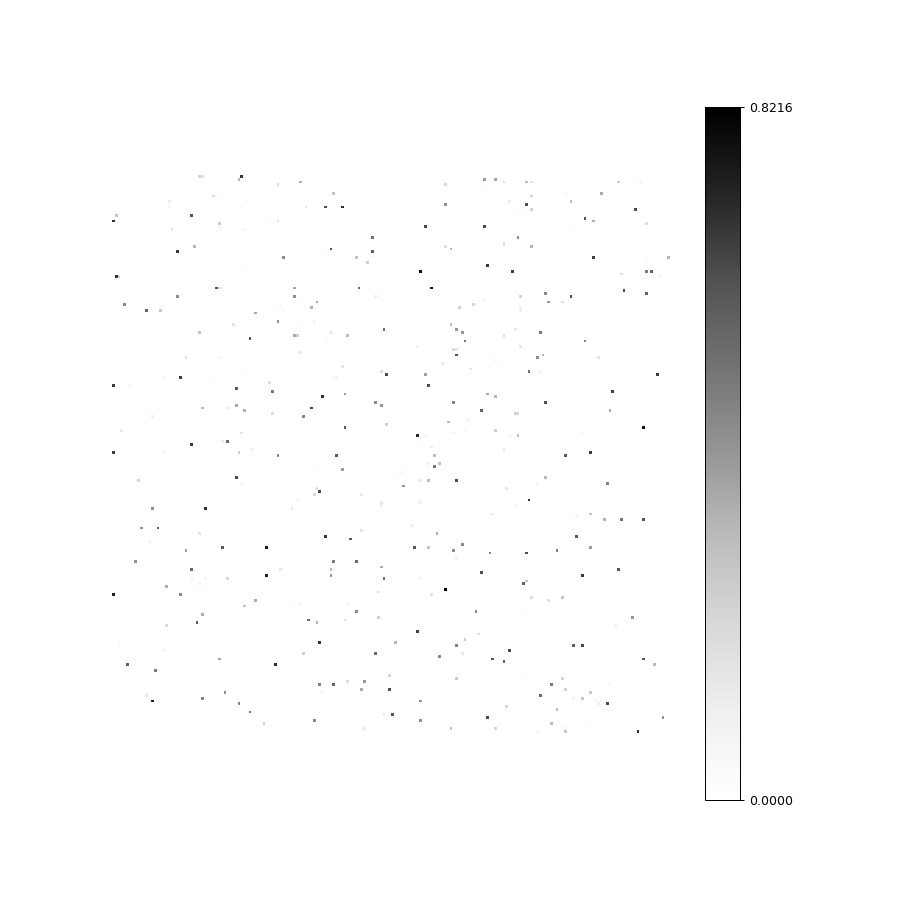

100%|██████████| 10000/10000 [00:08<00:00, 1140.01it/s]


In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
eta = 0.1
zeta = 0.05


for ep in range(Nep):
    inputs = gp_data
    
    io_bb = cp.zeros((iN, 1))
    io_b = cp.zeros((iN, 1))
    
    so_b = cp.zeros((sN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io = iw @ so
        
        io_p = (io + io_bb) / 2

        # Train for smoothness in time
        iw += iw * (io_p - io_b) * (so_b).T * eta

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

        io_bb = io_b
        io_b = io
        
        so_b = so

    if (ep // 2) % 2:
        draw_weights(iw.get(), Ix, Iy, Kx, fig)
    else:
        draw_weights(sw.get(), Kx, Ky, sl, fig)

Shoot dang!  ...I think it might have worked???? Let's see.

<IPython.core.display.Javascript object>


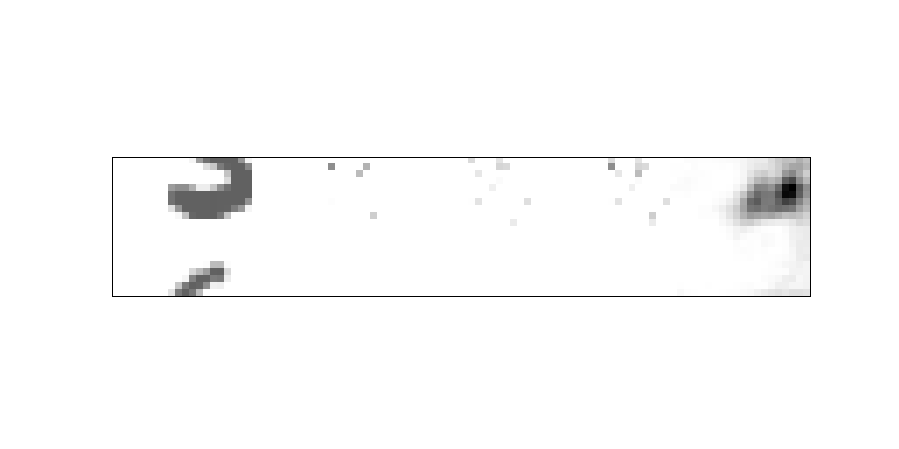

100%|██████████| 500/500 [00:00<00:00, 538.68it/s]


In [11]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io_b = np.zeros((iN, 1))
io_bb = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io = iw_np @ so

    io_p = (io + io_bb) / 2

    io_bb = io_b
    io_b = io
    
    mini_tap = np.zeros((20, 100))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io_bb.reshape(glee, glee)
    mini_tap[:glee, 60 - glee:60] = io_p.reshape(glee, glee)
    mini_tap[:glee, 80 - glee:80] = np.abs(io_bb - io_p).reshape(glee, glee) 
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Ok, so it didn't work.  That being said, the invariant layer looked like it pretty quickly zeroed in a select few number of of pixels per neuron, which is a good thing.  I'm going to train it again, but slower this time.

<IPython.core.display.Javascript object>


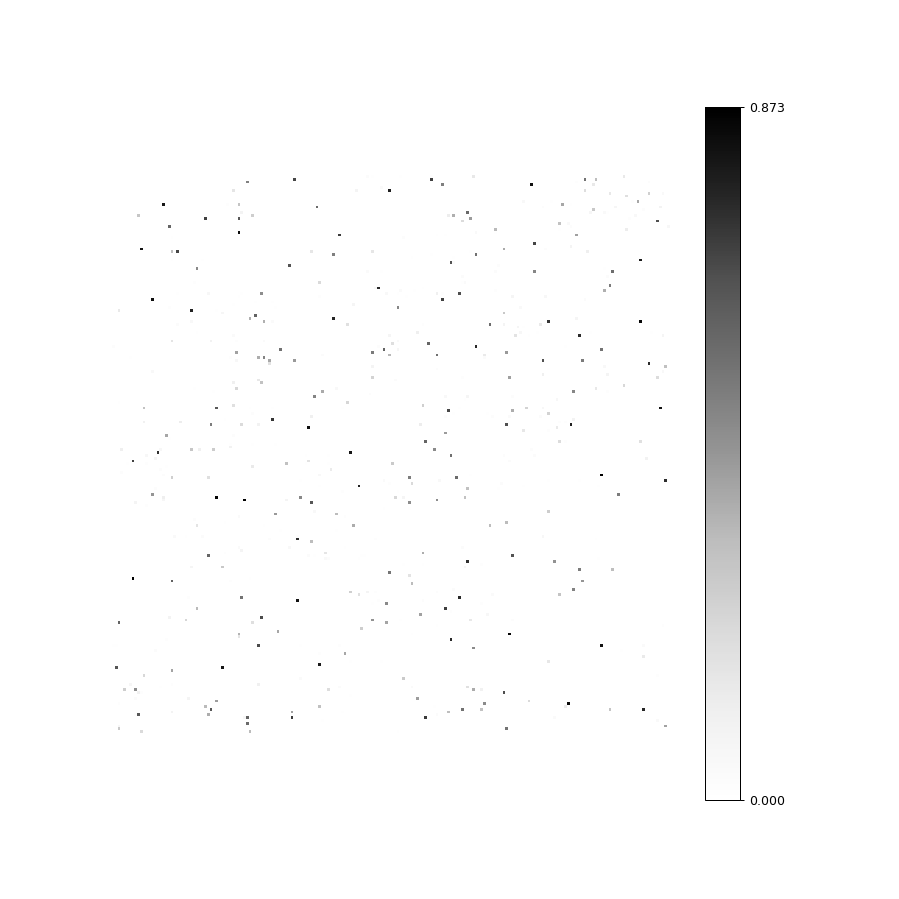

100%|██████████| 10000/10000 [00:08<00:00, 1141.42it/s]


In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
eta = 0.01
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io_bb = cp.zeros((iN, 1))
    io_b = cp.zeros((iN, 1))
    
    so_b = cp.zeros((sN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io = iw @ so
        
        io_p = (io + io_bb) / 2

        # Train for smoothness in time
        iw += iw * (io_p - io_b) * (so_b).T * eta

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

        io_bb = io_b
        io_b = io
        
        so_b = so

    draw_weights(iw.get(), Ix, Iy, Kx, fig)


Hmm, let's take a look at the animation.

<IPython.core.display.Javascript object>


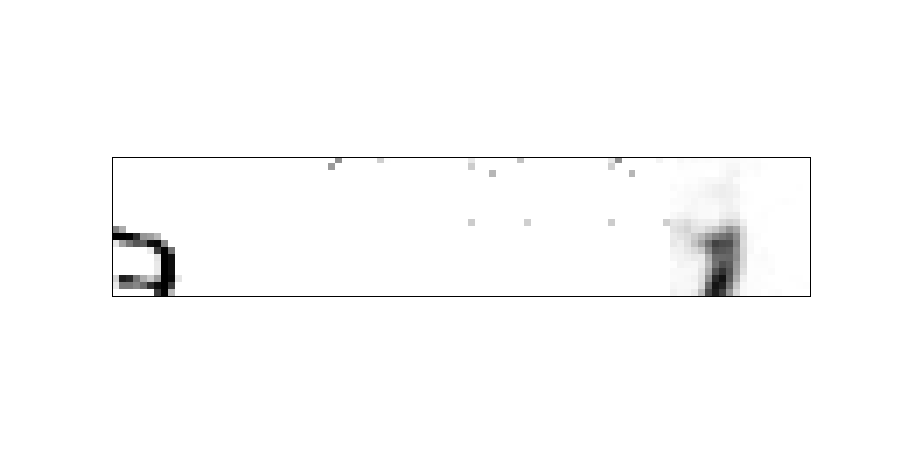

100%|██████████| 500/500 [00:00<00:00, 530.98it/s]


In [14]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io_b = np.zeros((iN, 1))
io_bb = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io = iw_np @ so

    io_p = (io + io_bb) / 2

    io_bb = io_b
    io_b = io
    
    mini_tap = np.zeros((20, 100))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io_bb.reshape(glee, glee)
    mini_tap[:glee, 60 - glee:60] = io_p.reshape(glee, glee)
    mini_tap[:glee, 80 - glee:80] = np.abs(io_bb - io_p).reshape(glee, glee) 
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Hmmm.  Let's take a look at the prototypes to which the first neuron corresponds.

<IPython.core.display.Javascript object>


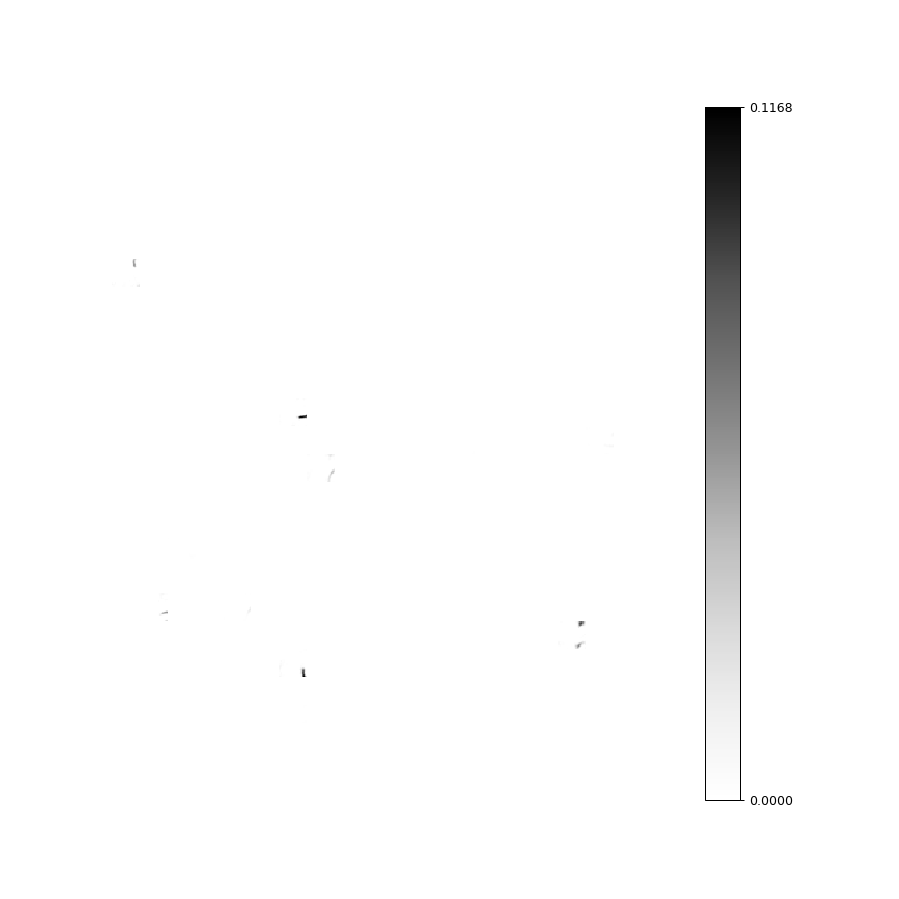

In [22]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[55].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


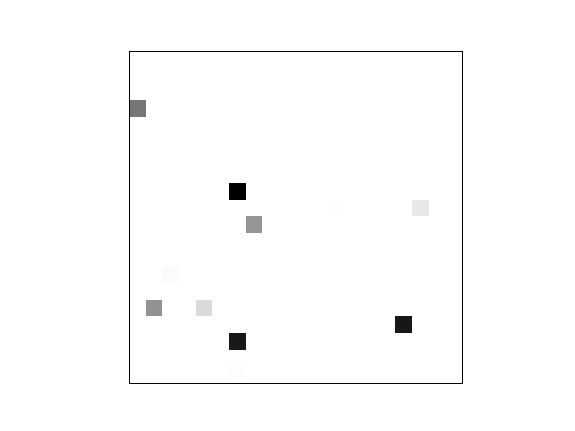

In [23]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(iw[55].reshape(Kx, Ky).get(), cmap="gray_r")

Hmm, I'm going to try this same thing again, but with a higher `eta`.  Then I think I'm going to try an EMA on the invariant output in an effort to ensure smoothness.

<IPython.core.display.Javascript object>


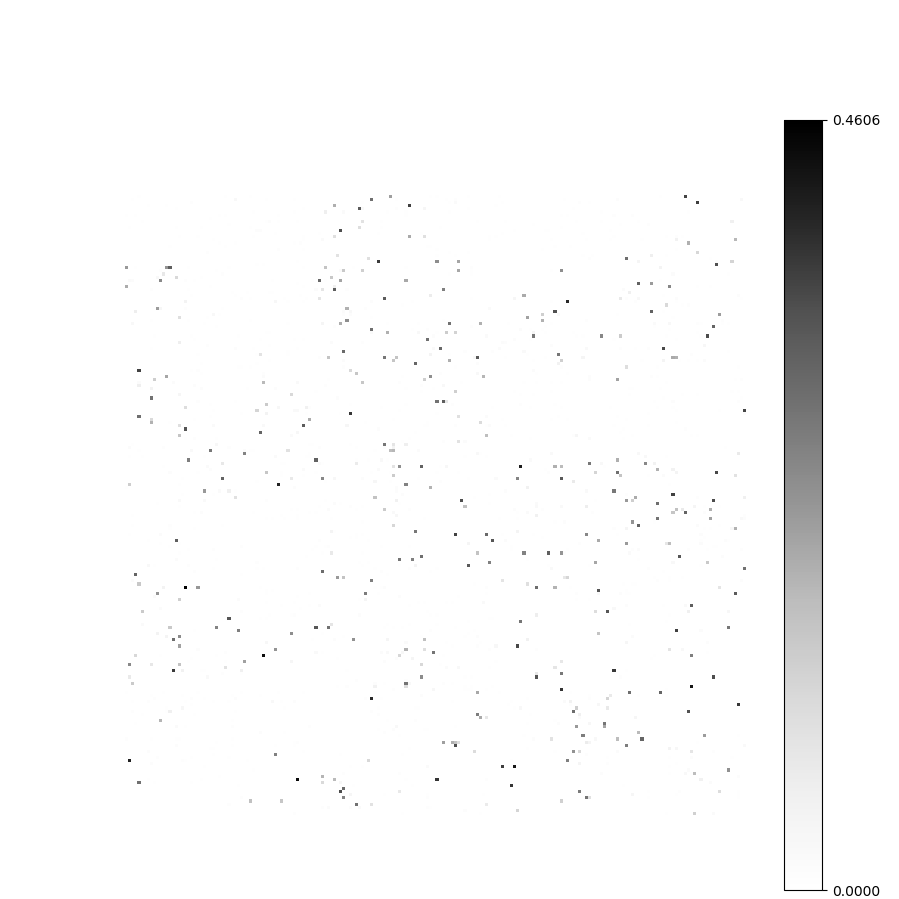

 28%|██▊       | 2765/10000 [00:02<00:06, 1080.81it/s]


KeyboardInterrupt: 

In [24]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
eta = 0.1
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io_bb = cp.zeros((iN, 1))
    io_b = cp.zeros((iN, 1))
    
    so_b = cp.zeros((sN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io = iw @ so
        
        io_p = (io + io_bb) / 2

        # Train for smoothness in time
        iw += iw * (io_p - io_b) * (so_b).T * eta

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

        io_bb = io_b
        io_b = io
        
        so_b = so

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

<IPython.core.display.Javascript object>


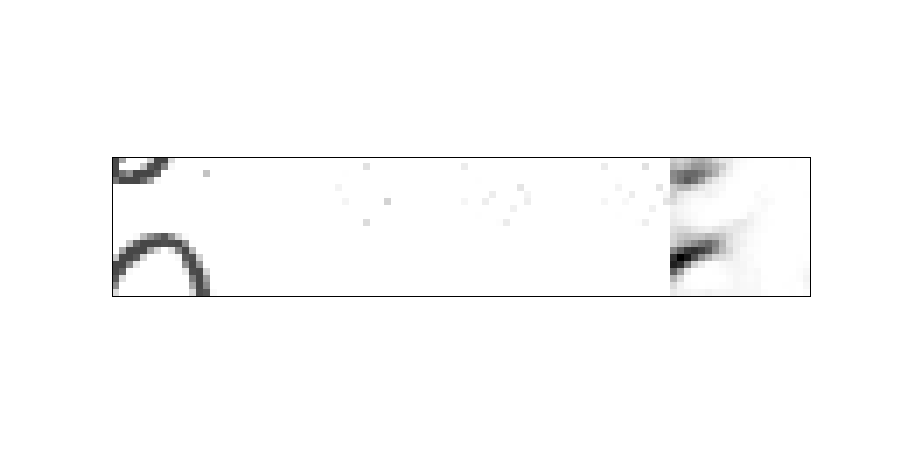

100%|██████████| 500/500 [00:01<00:00, 442.38it/s]


In [25]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io_b = np.zeros((iN, 1))
io_bb = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io = iw_np @ so

    io_p = (io + io_bb) / 2

    io_bb = io_b
    io_b = io
    
    mini_tap = np.zeros((20, 100))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io_bb.reshape(glee, glee)
    mini_tap[:glee, 60 - glee:60] = io_p.reshape(glee, glee)
    mini_tap[:glee, 80 - glee:80] = np.abs(io_bb - io_p).reshape(glee, glee) 
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Yeah, that's kinda just no good.  I'm going to reduce the number of neurons in the invariant layer, see what happens there.

<IPython.core.display.Javascript object>


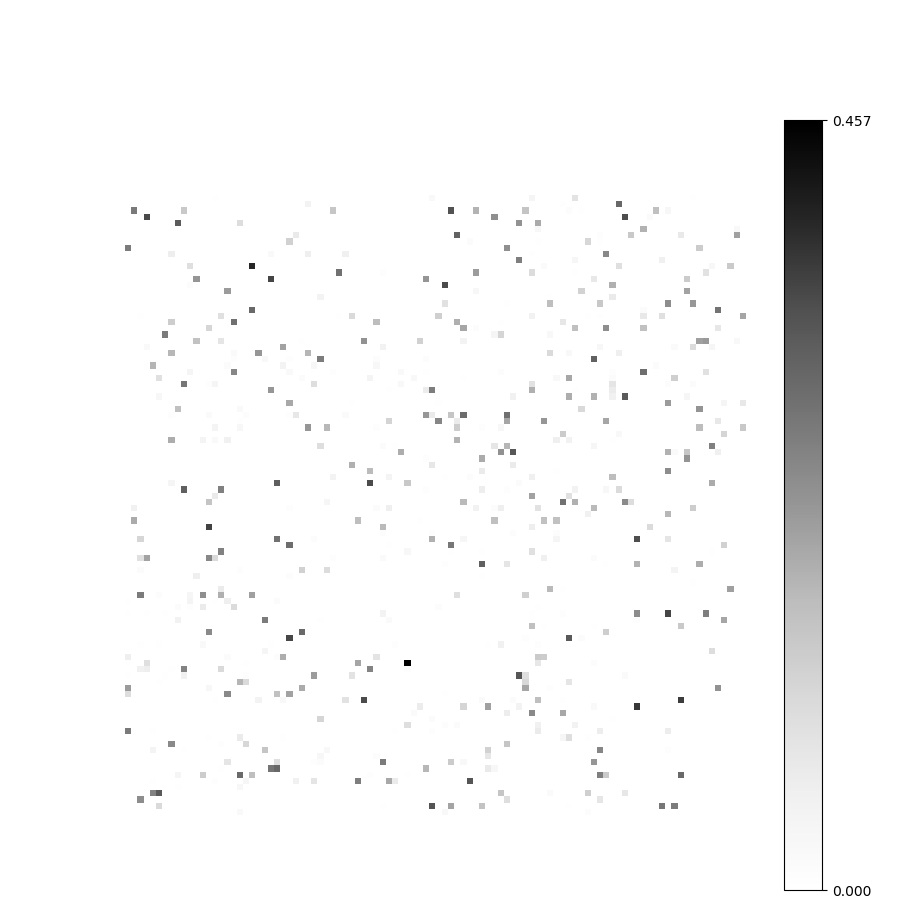

 26%|██▋       | 2634/10000 [00:02<00:06, 1099.30it/s]


KeyboardInterrupt: 

In [26]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 5
Iy = 5
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
eta = 0.1
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io_bb = cp.zeros((iN, 1))
    io_b = cp.zeros((iN, 1))
    
    so_b = cp.zeros((sN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io = iw @ so
        
        io_p = (io + io_bb) / 2

        # Train for smoothness in time
        iw += iw * (io_p - io_b) * (so_b).T * eta

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

        io_bb = io_b
        io_b = io
        
        so_b = so

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

<IPython.core.display.Javascript object>


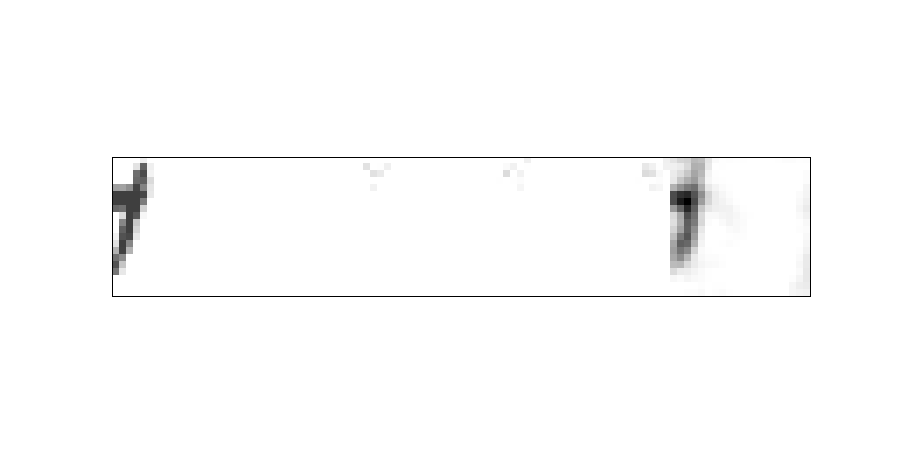

100%|██████████| 500/500 [00:00<00:00, 524.80it/s]


In [27]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io_b = np.zeros((iN, 1))
io_bb = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io = iw_np @ so

    io_p = (io + io_bb) / 2

    io_bb = io_b
    io_b = io
    
    mini_tap = np.zeros((20, 100))
    
    glee = 5
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io_bb.reshape(glee, glee)
    mini_tap[:glee, 60 - glee:60] = io_p.reshape(glee, glee)
    mini_tap[:glee, 80 - glee:80] = np.abs(io_bb - io_p).reshape(glee, glee) 
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


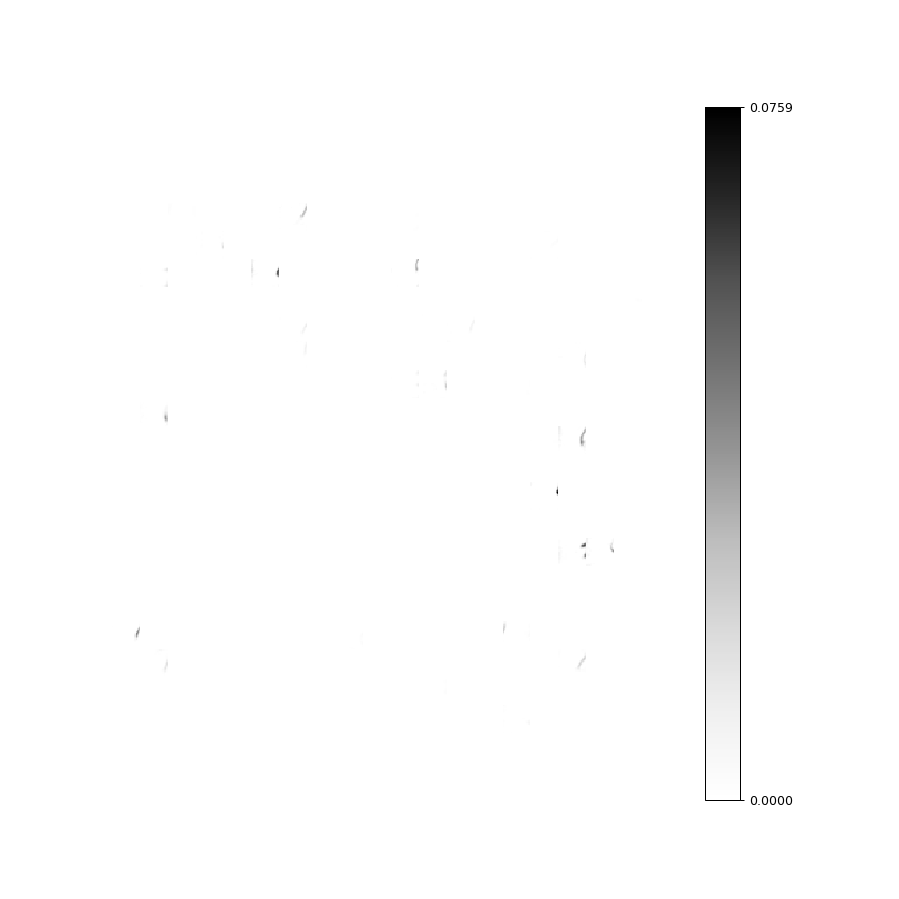

In [38]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[23].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

Remarkably enough, in looking at which sparse features each invariant neuron is tuned to, they actually seem to be related.  It looks like they generally tend to be oriented in the same direction.  That's actually pretty great.  Ok, here's the new idea.  I'm going to do an EMA as the invariant layer's output, so hopefully the invariant neurons will lock onto related sparse features. Here we go.  I'm going to use a pretty large ema `alpha` for the time being.

<IPython.core.display.Javascript object>


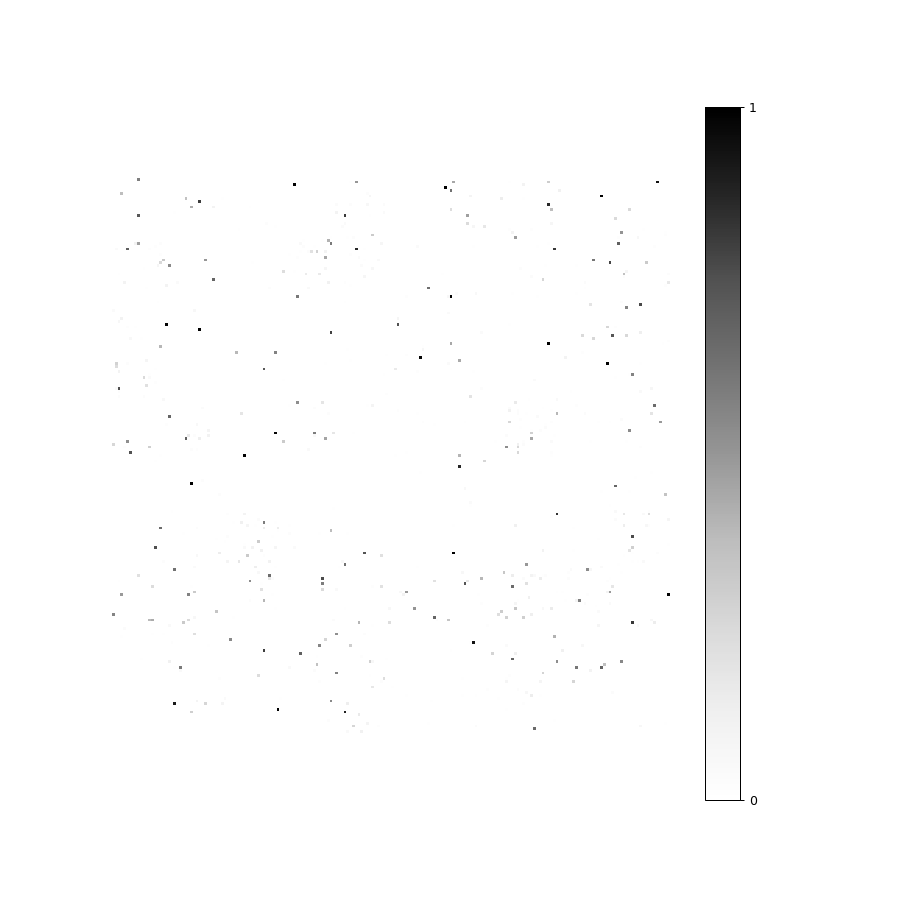

100%|██████████| 10000/10000 [00:08<00:00, 1225.79it/s]


In [39]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
alpha = 0.5
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

Promising?  Hopefully.

I'm going to look at the sparse features to which the different neurons correspond, and we'll see what's what.

<IPython.core.display.Javascript object>


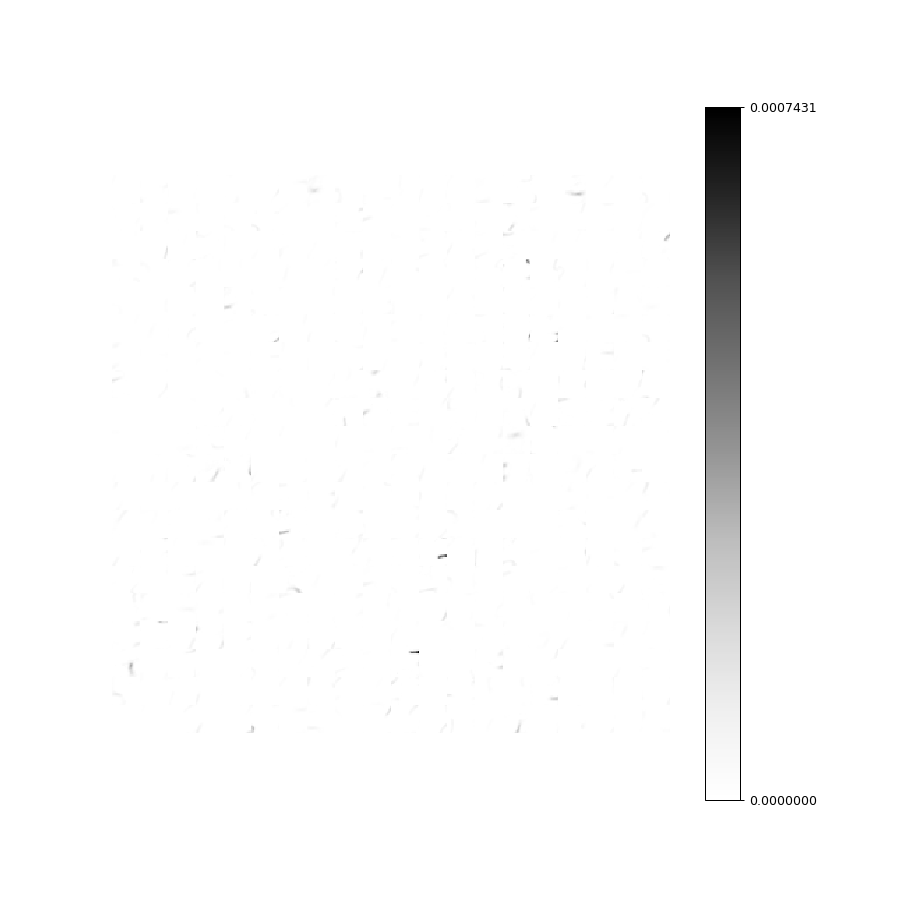

In [46]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[31].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

The prototypes seem to be generally oriented in the same directions. I might need to train it with a smaller `zeta`.  And maybe on simpler data.

<IPython.core.display.Javascript object>


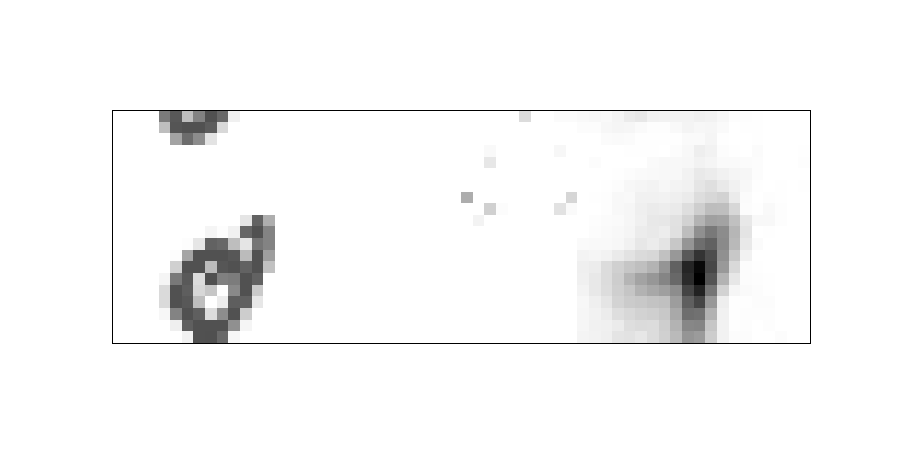

100%|██████████| 500/500 [00:00<00:00, 515.22it/s]


In [49]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Ok, I'm going to increase the ema and decrease the invariant learning constant, and try again.  I think this might actually be pretty juicy.  Also I think it'd be a good idea to make a new dataset that just has the digits moving in one direction.  That might be easier to train on.

<IPython.core.display.Javascript object>


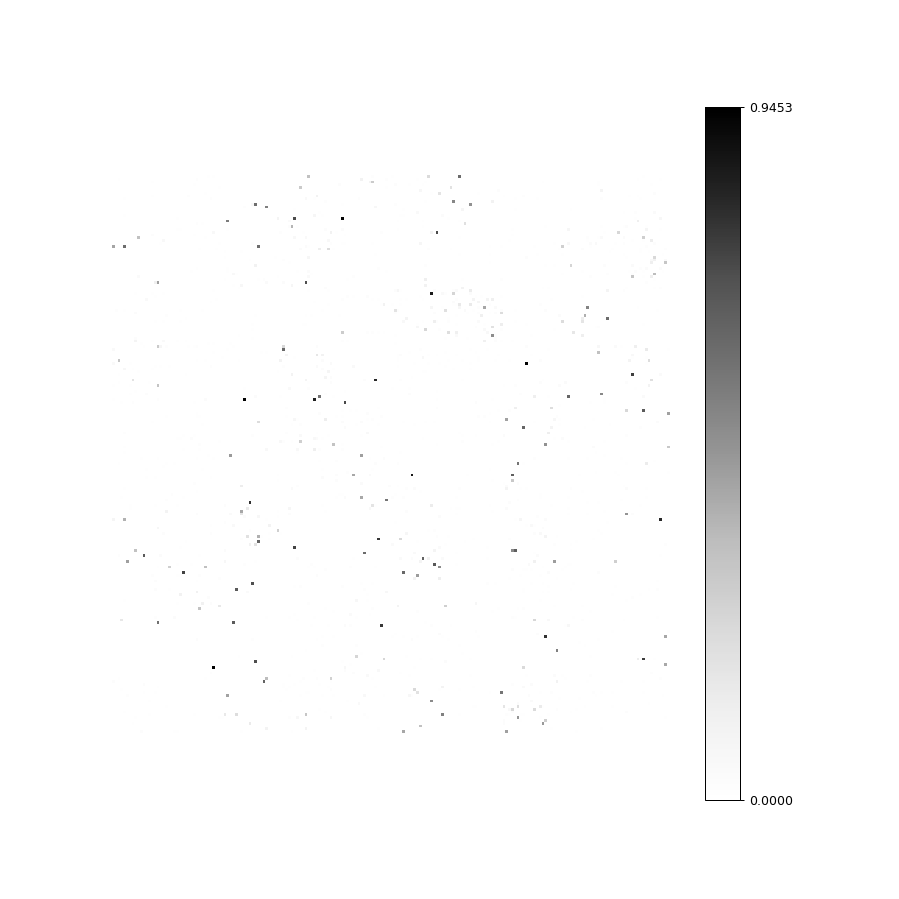

100%|██████████| 10000/10000 [00:08<00:00, 1217.95it/s]


In [50]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
alpha = 0.33
zeta = 0.005


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

I'm going to train this for another couple of epochs.

<IPython.core.display.Javascript object>


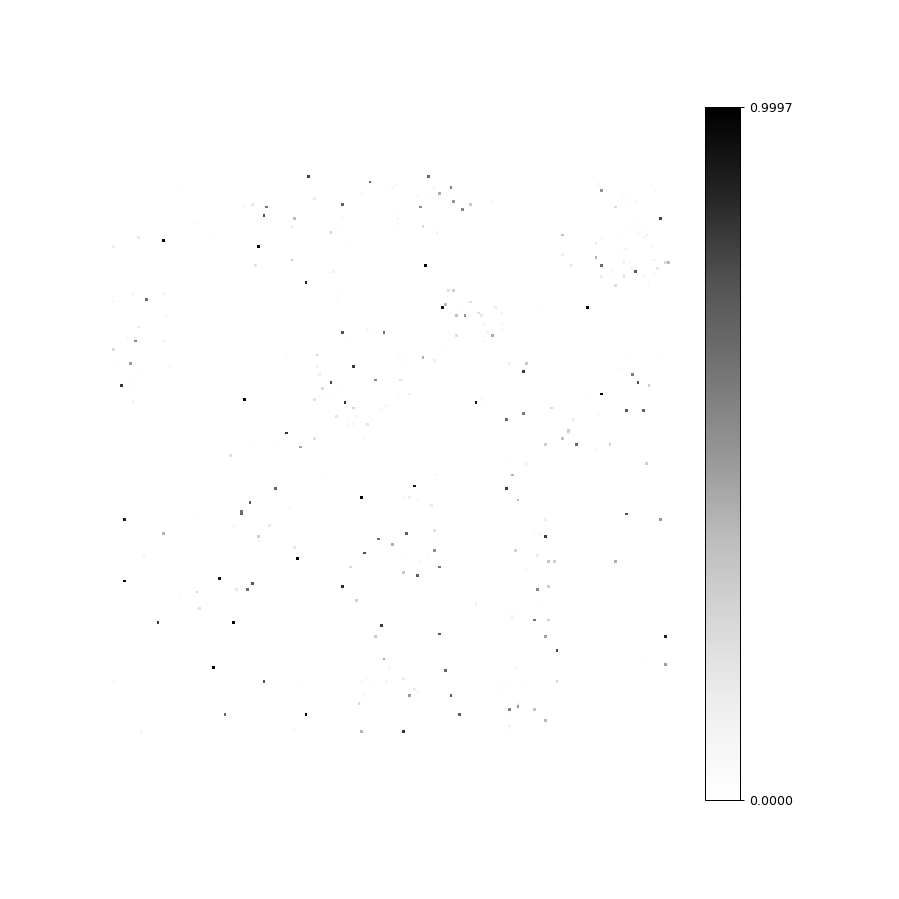

100%|██████████| 10000/10000 [00:08<00:00, 1214.87it/s]


In [51]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

I have high hopes for this one.

<IPython.core.display.Javascript object>


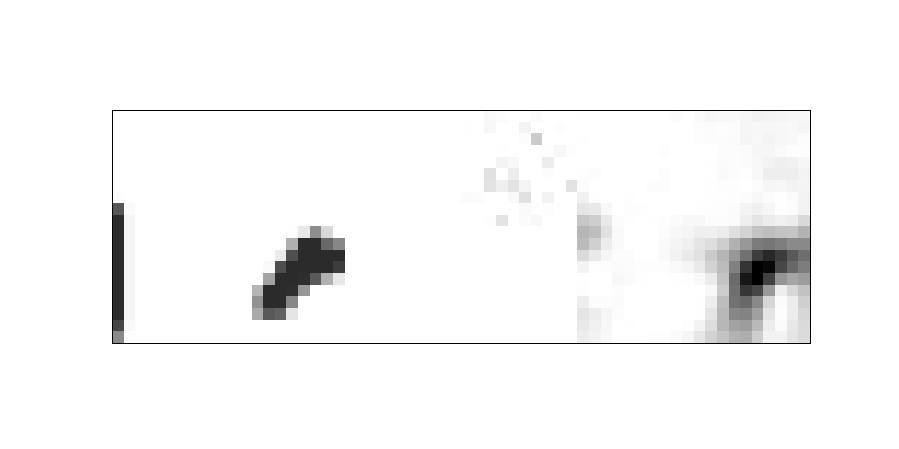

100%|██████████| 500/500 [00:01<00:00, 435.33it/s]


In [52]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

I'm just not a super huge fan of that though.  It looks more like decaying spikes than smoothly increasing or decreasing features.  I'm going to train this on a bunch more sparse neurons, and see what happens.

<IPython.core.display.Javascript object>


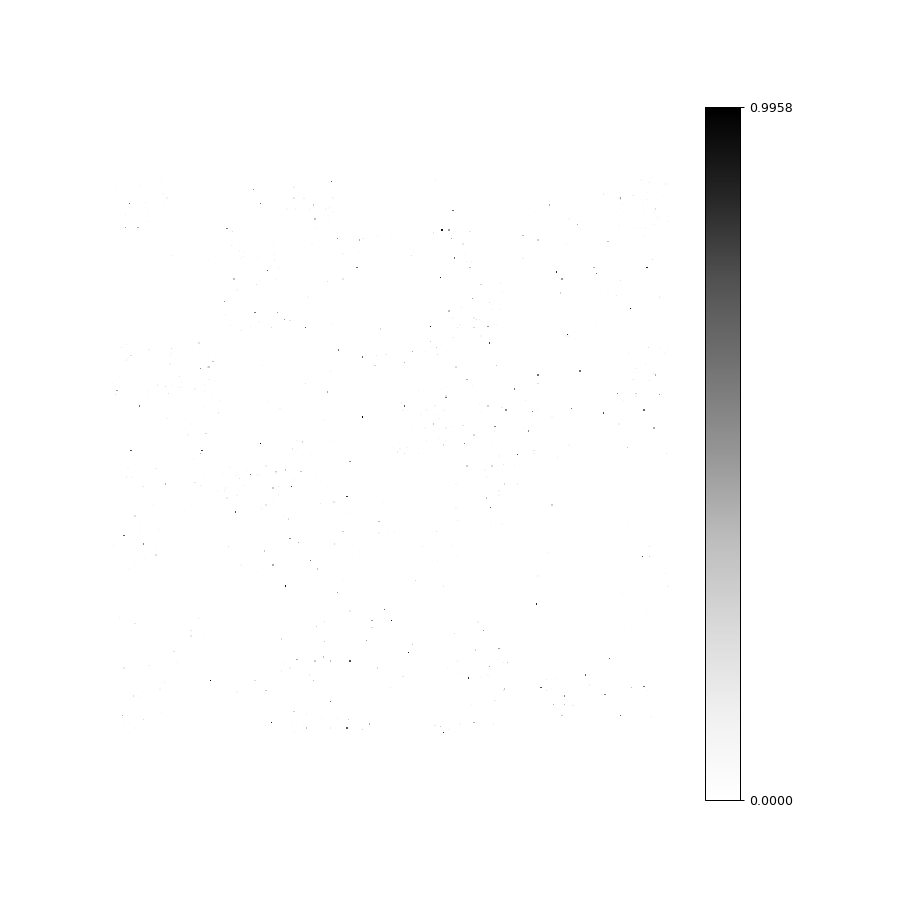

100%|██████████| 10000/10000 [00:08<00:00, 1166.08it/s]


In [53]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 40
Ky = 40
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.05

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 1, (iN, sN))
alpha = 0.33
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

<IPython.core.display.Javascript object>


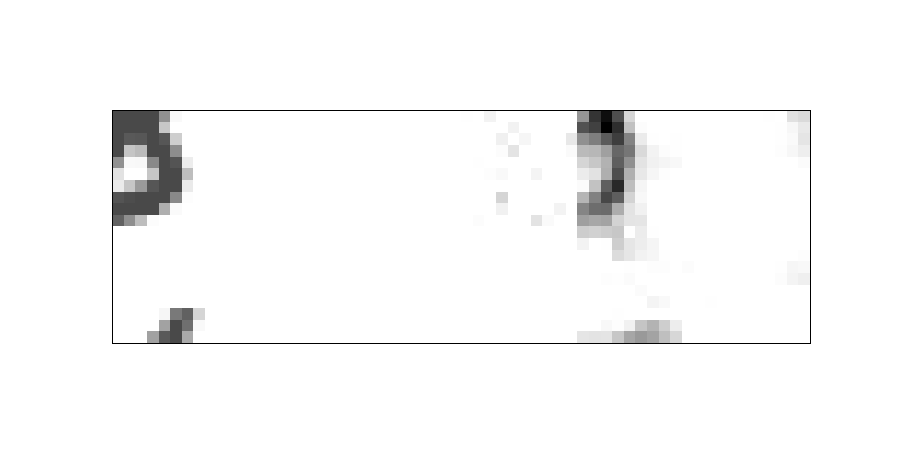

100%|██████████| 500/500 [00:01<00:00, 338.45it/s]


In [54]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


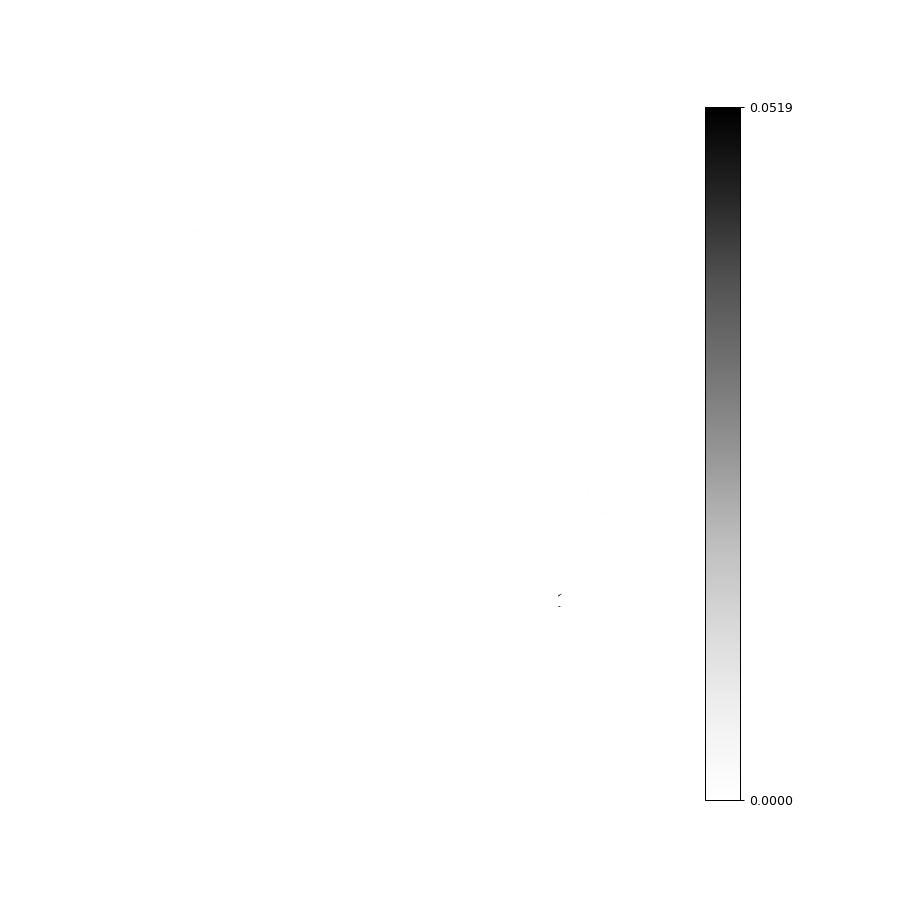

In [59]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[24].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

I'm going to do the 400 sparse neuron network again because I forgot to look at the feature map for different neurons.

<IPython.core.display.Javascript object>


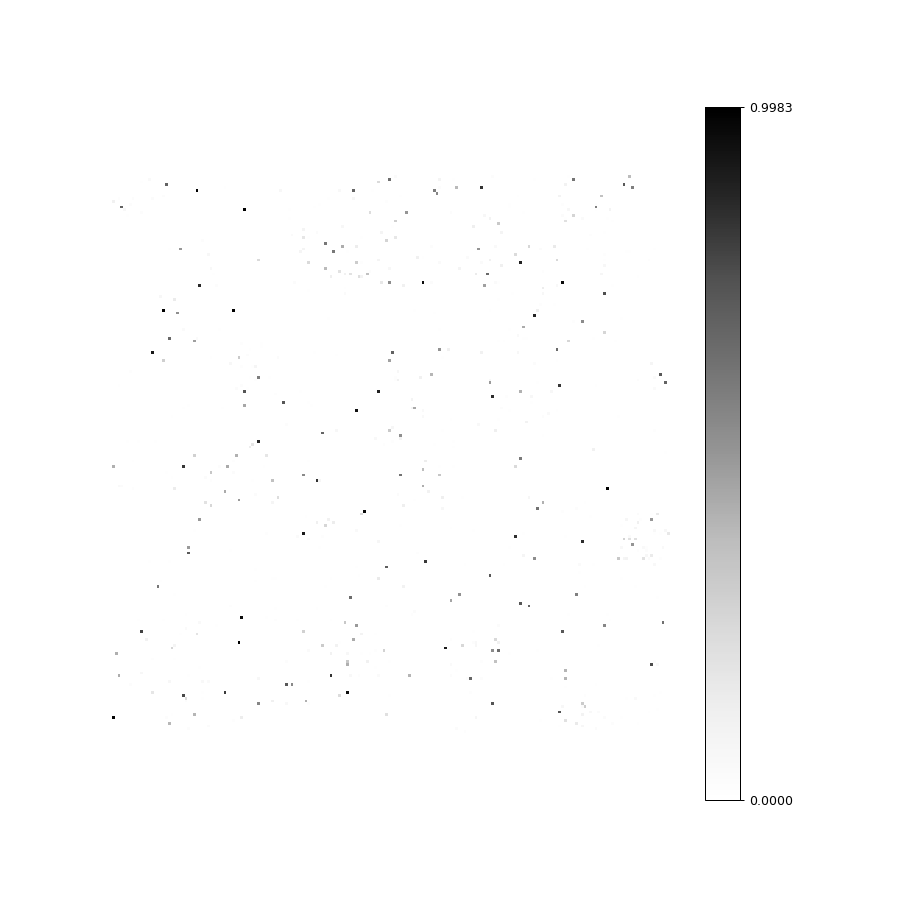

100%|██████████| 10000/10000 [00:07<00:00, 1262.38it/s]


In [60]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 5 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 0.1, (iN, sN))
alpha = 0.33
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    draw_weights(iw.get(), Ix, Iy, Kx, fig)

<IPython.core.display.Javascript object>


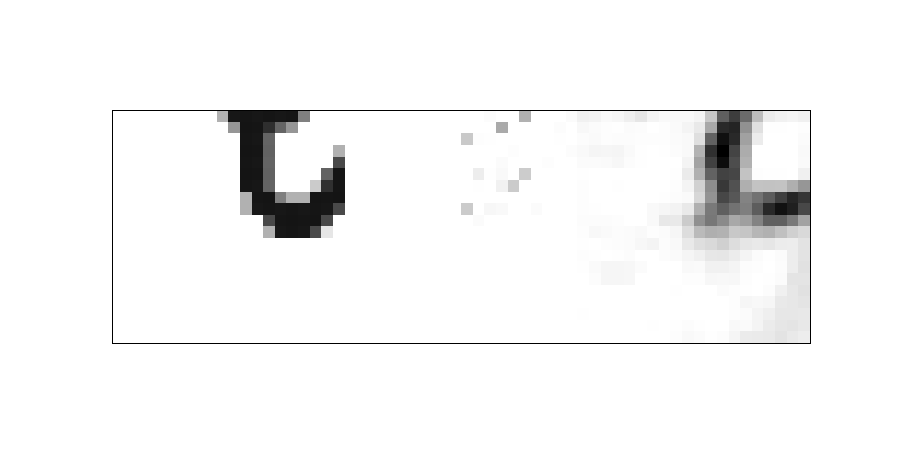

100%|██████████| 500/500 [00:01<00:00, 428.92it/s]


In [61]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Ok, not sure what that tells me.  Let's look at some of the prototypes.

<IPython.core.display.Javascript object>


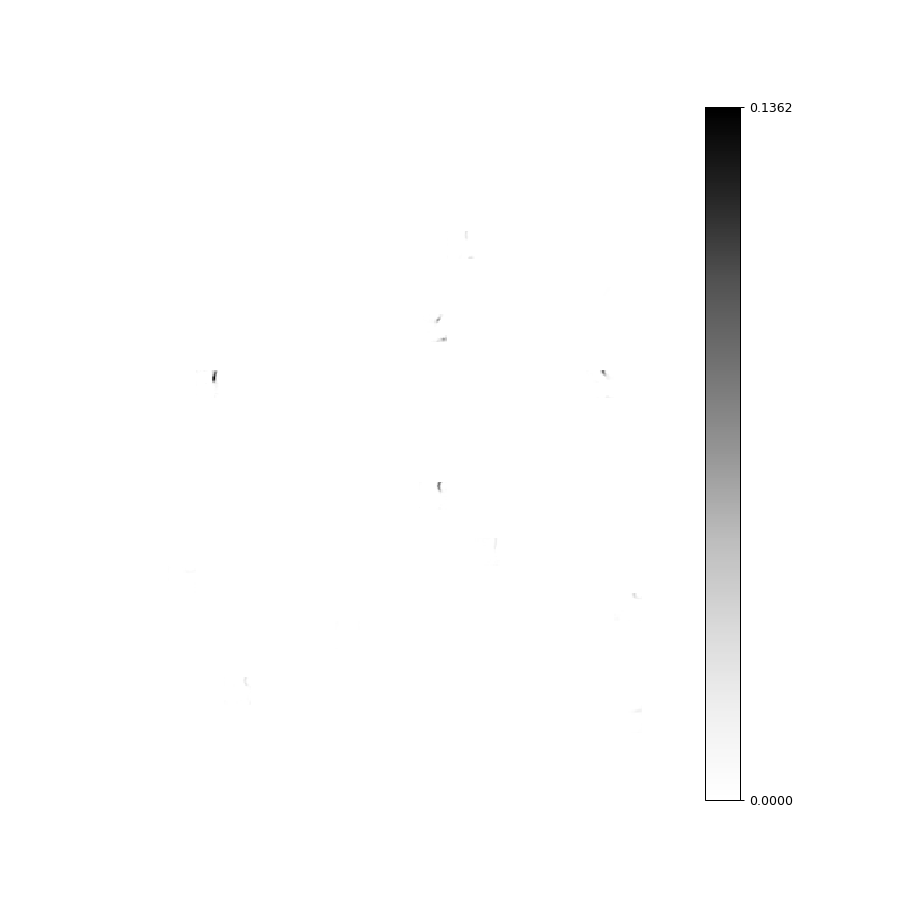

In [87]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[55].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


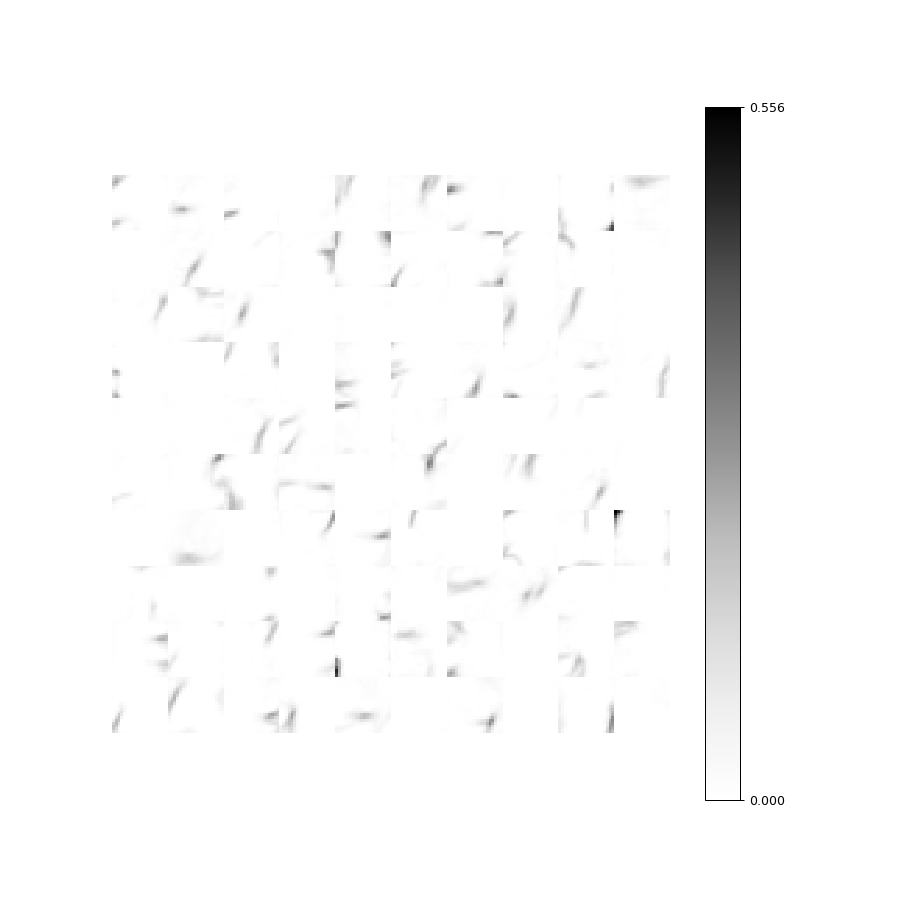

In [89]:
fig = plt.figure(figsize=(10, 10))

draw_weights((iw @ sw).get(), Ix, Iy, Kx, fig)

Hmm, I guess I'm not exactly sure how to feel about that.  I'm going to make an animation without the ema, and see how smooth it is.

<IPython.core.display.Javascript object>


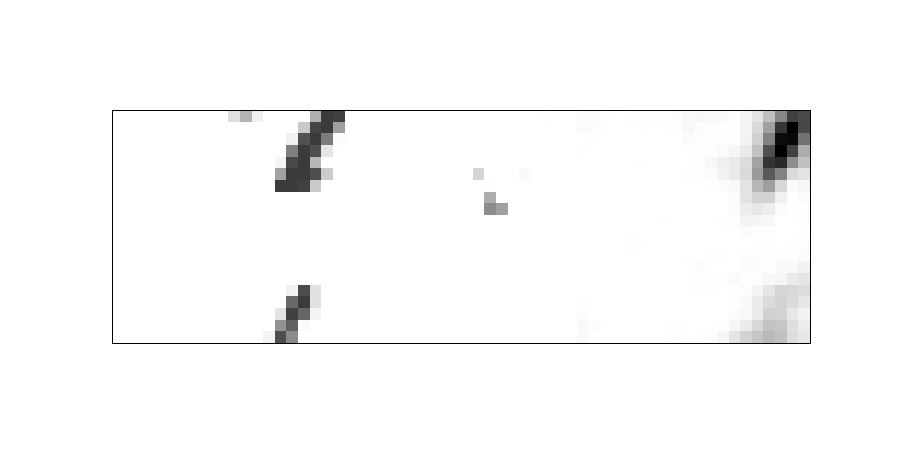

100%|██████████| 500/500 [00:00<00:00, 535.36it/s]


In [90]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io_pert.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Hmm, I guess some of the pixels are kinda invariant, I suppose.  Based on what I'm seeing in the cell two above, the invariant layer is learning the prototypes that are pretty close together.  I guess that's pretty dope.  I think the ribbon is a really good idea.  The last thing I do before I close out this experiment is try with a smaller `alpha` one more time.  I think that might be super dope.  I'm also going to try eight winners this time.

<IPython.core.display.Javascript object>


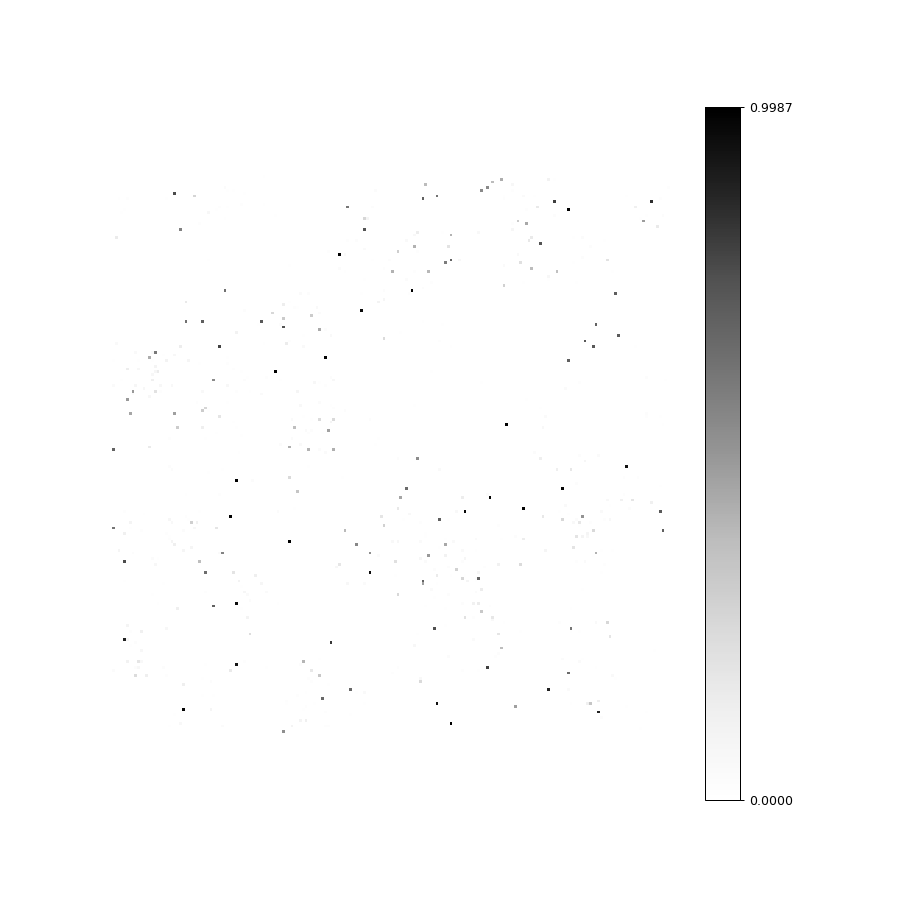

100%|██████████| 10000/10000 [00:07<00:00, 1260.00it/s]


In [91]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 20
Ky = 20
sN = Kx * Ky
m_len = sl ** 2

n_w = 8 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.01

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 0.1, (iN, sN))
alpha = 0.5
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    if (ep // 2) % 2:
        draw_weights(iw.get(), Ix, Iy, Kx, fig)
    else:
        draw_weights(sw.get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


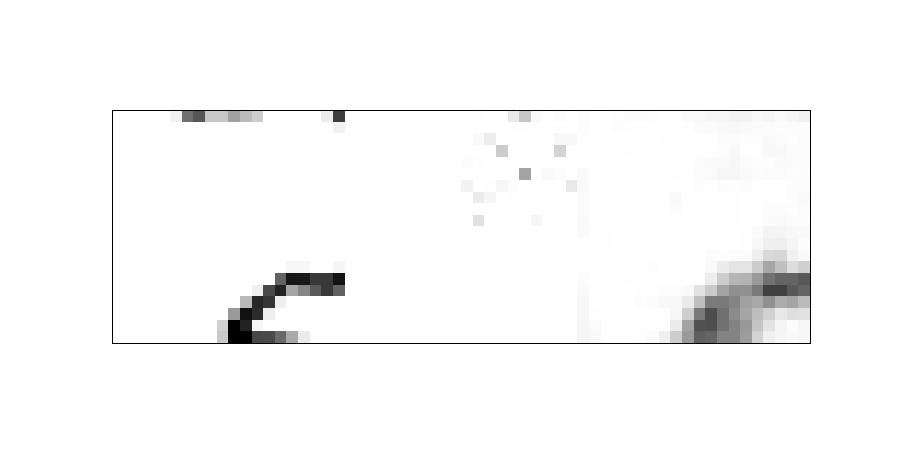

100%|██████████| 500/500 [00:00<00:00, 536.59it/s]


In [92]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

Ok, that's reasonably encouraging.  Now, let's see what we're looking at in terms of features.

<IPython.core.display.Javascript object>


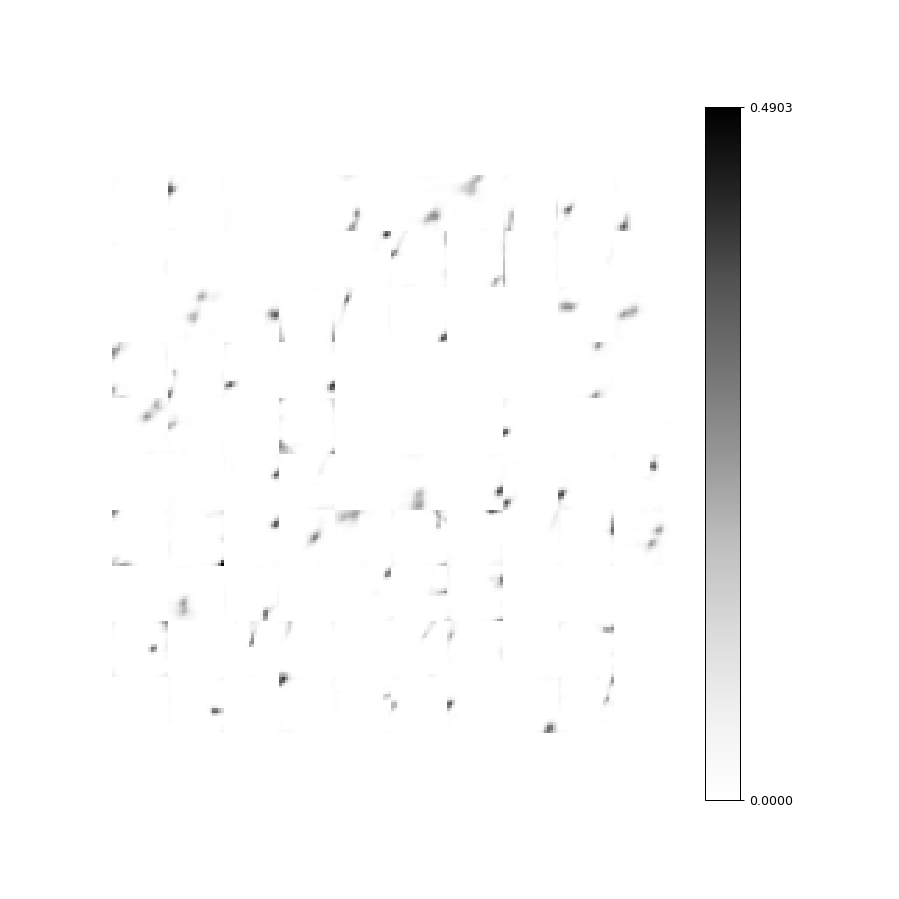

In [93]:
fig = plt.figure(figsize=(10, 10))

draw_weights((iw @ sw).get(), Ix, Iy, Kx, fig)

<IPython.core.display.Javascript object>


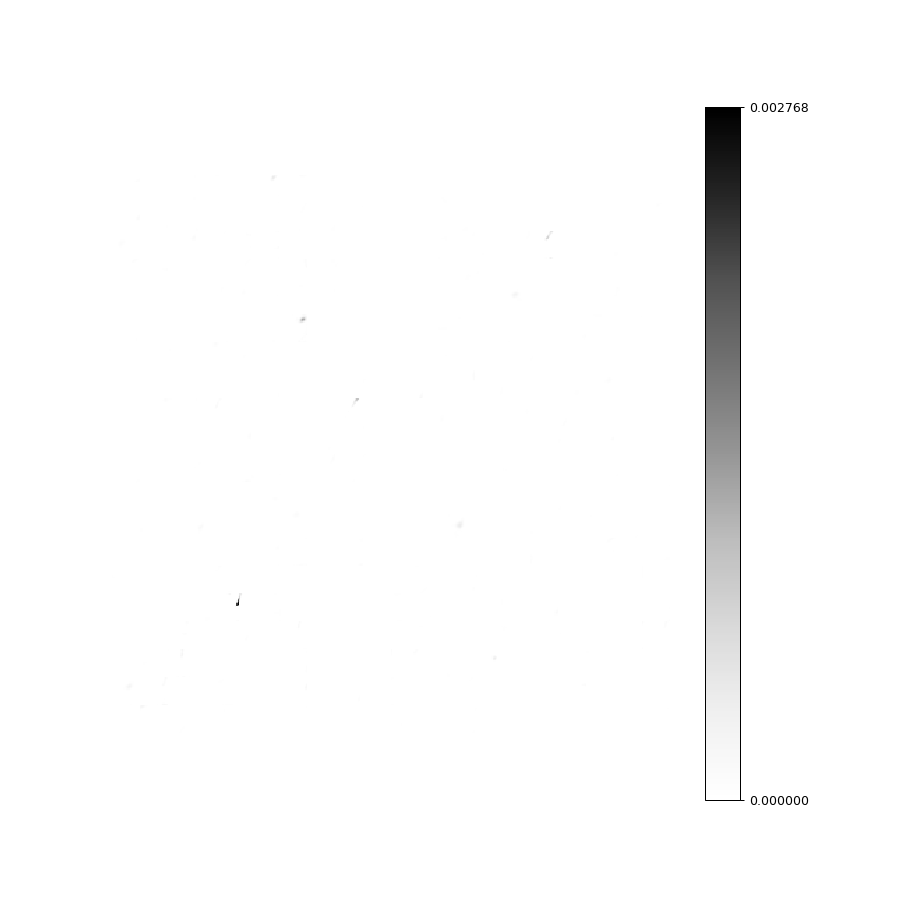

In [102]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[78].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

Hmm, that's weird.  I'm going to train it on 6 winners, and see what happens.  Then I'm done.  For real.

<IPython.core.display.Javascript object>


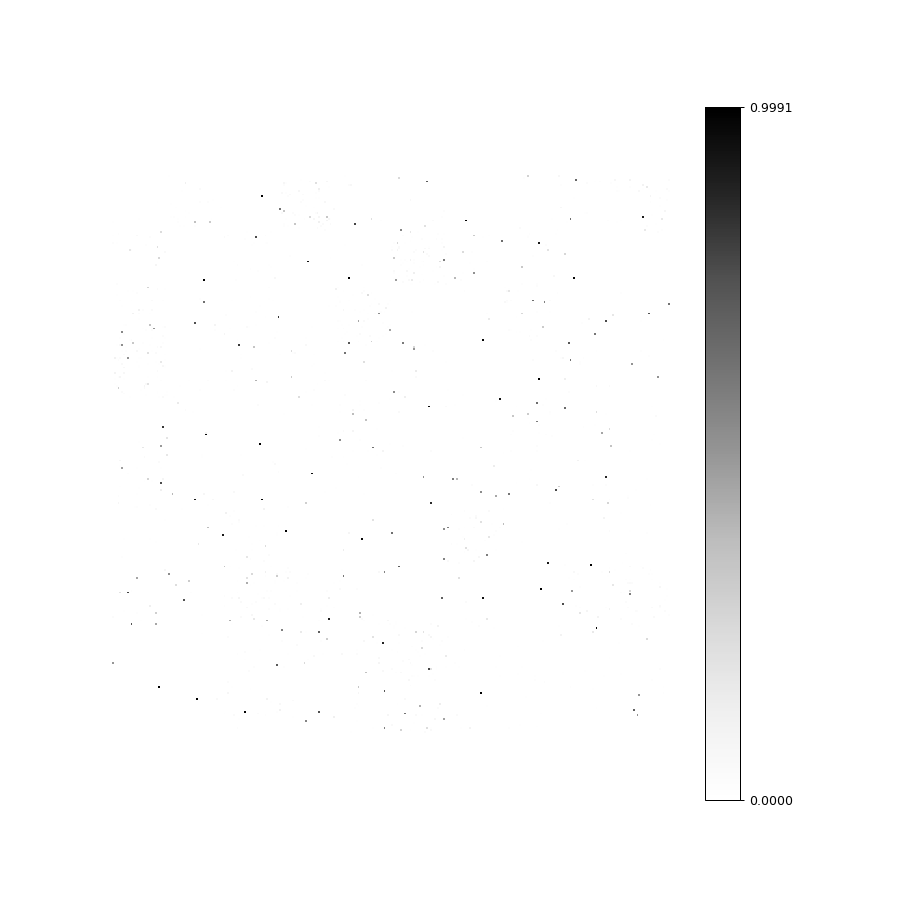

100%|██████████| 10000/10000 [00:08<00:00, 1201.45it/s]


In [104]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 30
Ky = 30
sN = Kx * Ky
m_len = sl ** 2

n_w = 6 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.03

# Invariant Layer
Ix = 10
Iy = 10
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 0.1, (iN, sN))
alpha = 0.5
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    if (ep // 2) % 2:
        draw_weights(iw.get(), Ix, Iy, Kx, fig)
    else:
        draw_weights(sw.get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


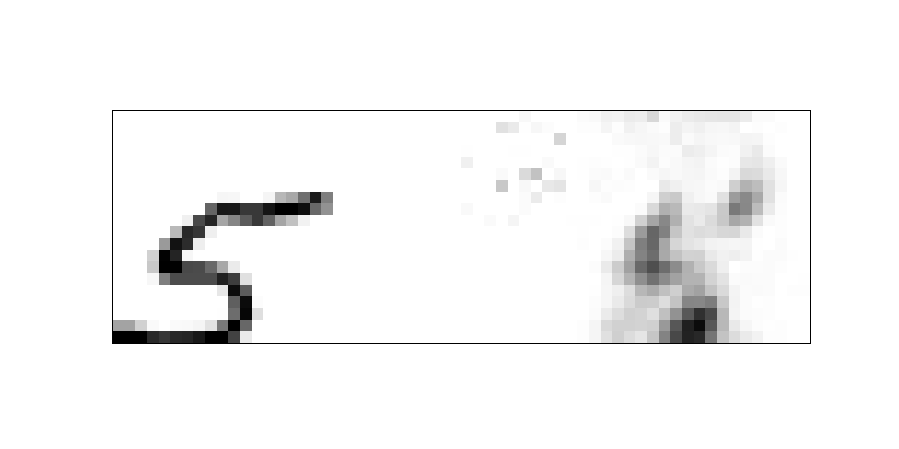

100%|██████████| 500/500 [00:01<00:00, 456.53it/s]


In [105]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))

sw_np = sw.get()
iw_np = iw.get()

ims = []

io = np.zeros((iN, 1))


for i in tqdm(range(500)):
    # Handle sparse layer
    v = ts_data[i].reshape(-1, 1)
    p = sw_np @ v
    winners = np.argsort(p, axis=0)[-n_w:]
    mask = np.zeros((sN, 1))
    mask[winners] = 1
    so_uw = mask * p
    r = sw_np.T @ so_uw
    mod_r = np.maximum(r, prec)
    e = v - r

    so = so_uw / np.sum(sw_np, axis=1).reshape(-1, 1)

    # Handle invariant layer
    io_pert = iw_np @ so

    io += (io_pert - io) * alpha
    
    mini_tap = np.zeros((20, 60))
    
    glee = 10
    
    mini_tap[:, :20] = v.reshape(20, 20)
    mini_tap[:glee, 40 - glee:40] = io.reshape(glee, glee)
    mini_tap[:, -20:] = r.reshape(20, 20)
    
    im = plt.imshow(mini_tap, cmap="gray_r", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


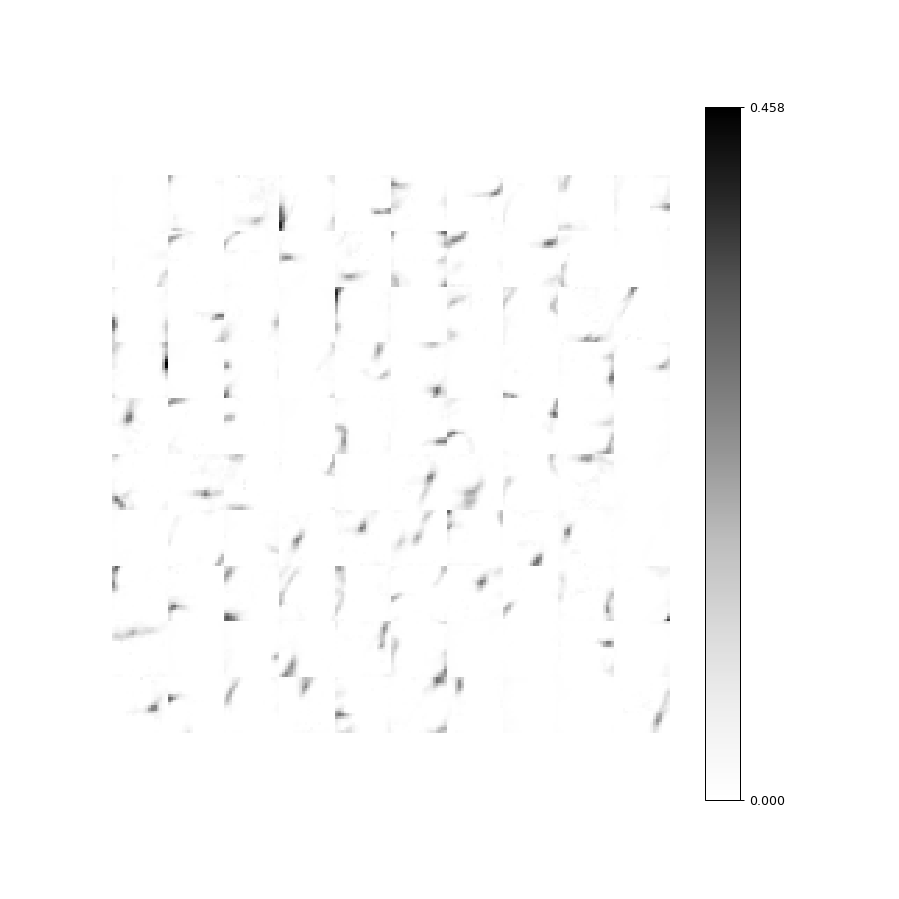

In [108]:
fig = plt.figure(figsize=(10, 10))

draw_weights((iw @ sw).get(), Ix, Iy, 20, fig)

<IPython.core.display.Javascript object>


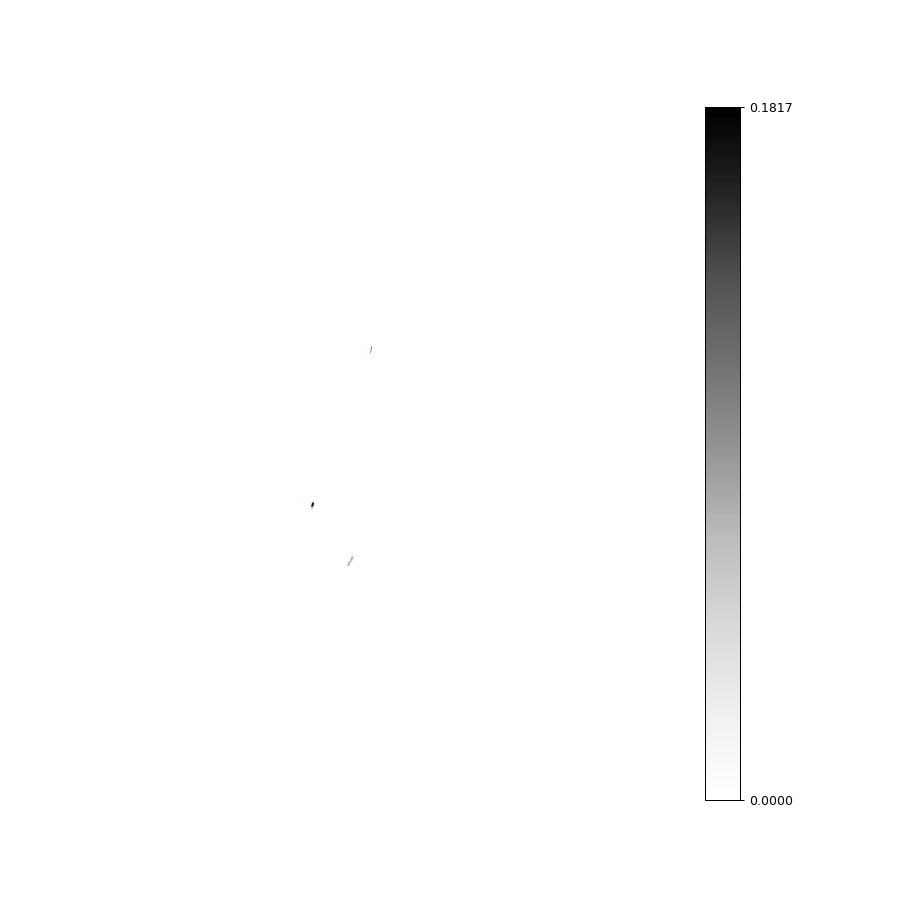

In [116]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * iw[99].reshape(-1, 1)).get(), Kx, Ky, sl, fig)

Wait, one more experiment.  I promise this is the last one.  I'm going to train it on fewer invariant neurons, so the invariant neurons are forced to pick up on more sparse features.  

<IPython.core.display.Javascript object>


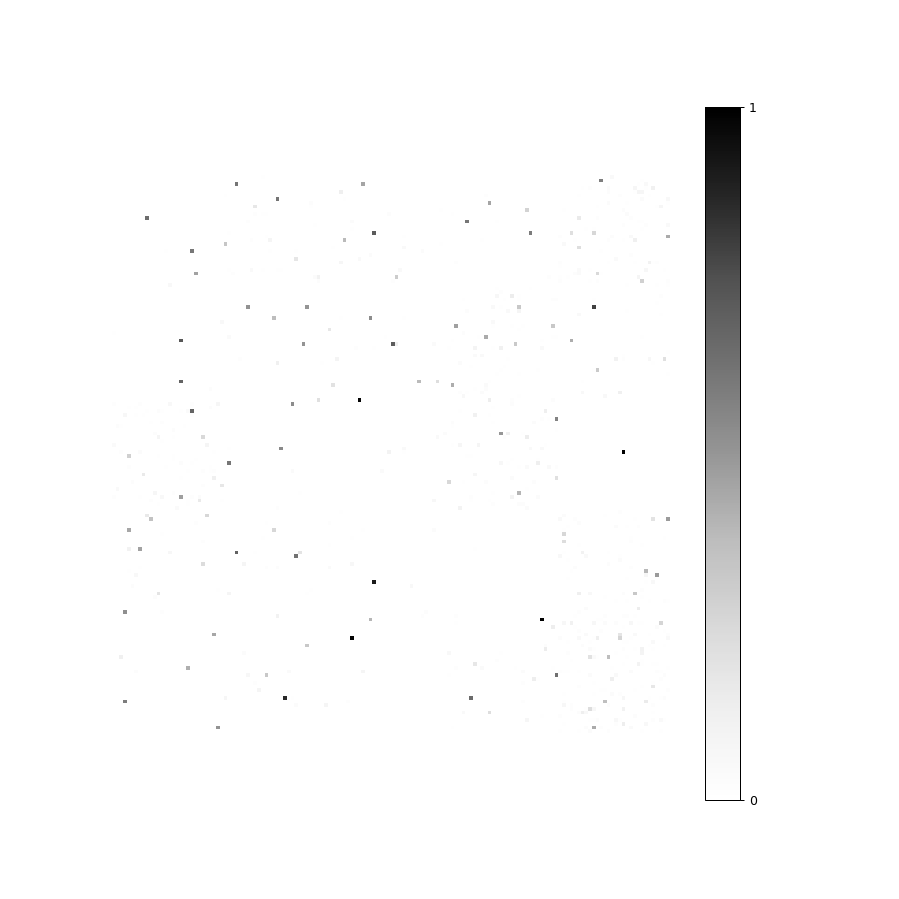

100%|██████████| 10000/10000 [00:08<00:00, 1205.82it/s]


In [117]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 20
T_s = 10000
prec = 1e-10

# Sparse Layer
Kx = 30
Ky = 30
sN = Kx * Ky
m_len = sl ** 2

n_w = 6 #Number of winners

sw = cp.random.uniform(0, 0.2, (sN, m_len))
xi = 0.03

# Invariant Layer
Ix = 5
Iy = 5
iN = Ix * Iy

in_w = 10 #Number of winners in the invariant layer

iw = cp.random.uniform(0, 0.1, (iN, sN))
alpha = 0.5
zeta = 0.01


for ep in range(Nep):
    inputs = gp_data
    
    io = cp.zeros((iN, 1))
    
    for i in tqdm(range(T_s)):

        # Handle sparse layer
        v = inputs[i].reshape(-1, 1)
        p = sw @ v
        winners = cp.argsort(p, axis=0)[-n_w:]
        mask = cp.zeros((sN, 1))
        mask[winners] = 1
        so_uw = mask * p
        r = sw.T @ so_uw
        mod_r = cp.maximum(r, prec)
        e = v - r

        sw += sw * so_uw * (e / mod_r).T * xi

        so = so_uw / cp.sum(sw, axis=1).reshape(-1, 1)

        # Handle invariant layer
        io_pert = iw @ so
        
        io += (io_pert - io) * alpha

        # Train for reconstruction ability
        r = iw.T @ io
        mod_r = cp.maximum(r, prec)
        e = so - r

        iw += iw * io * (e / mod_r).T * zeta

    if (ep // 2) % 2:
        draw_weights(iw.get(), Ix, Iy, Kx, fig)
    else:
        draw_weights(sw.get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


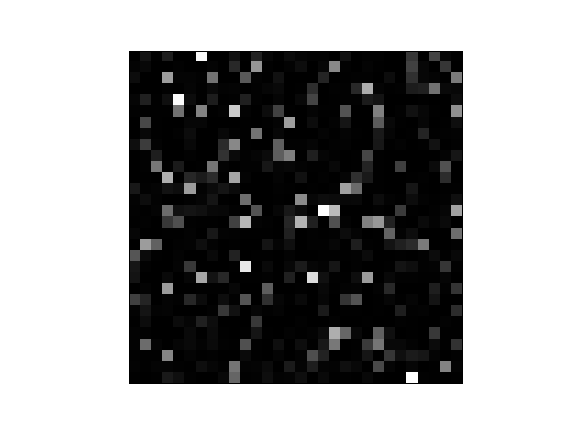

In [118]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(cp.sum(iw, axis=0).reshape(Kx, Ky).get(), cmap="gray")

Ok, so it has mostly adequate coverage of the entire sparse feature space.  Let's see this better.

<IPython.core.display.Javascript object>


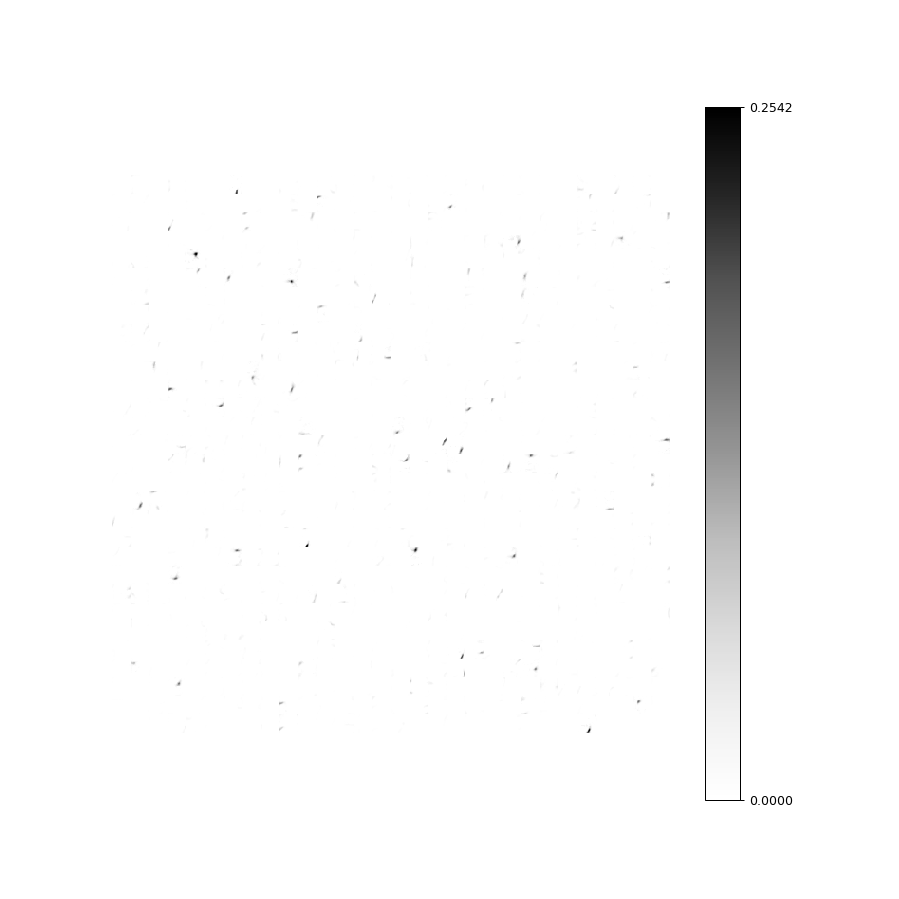

In [119]:
fig = plt.figure(figsize=(10,10))
draw_weights((sw * cp.sum(iw, axis=0).reshape(-1, 1)).get(), Kx, Ky, sl, fig)

<IPython.core.display.Javascript object>


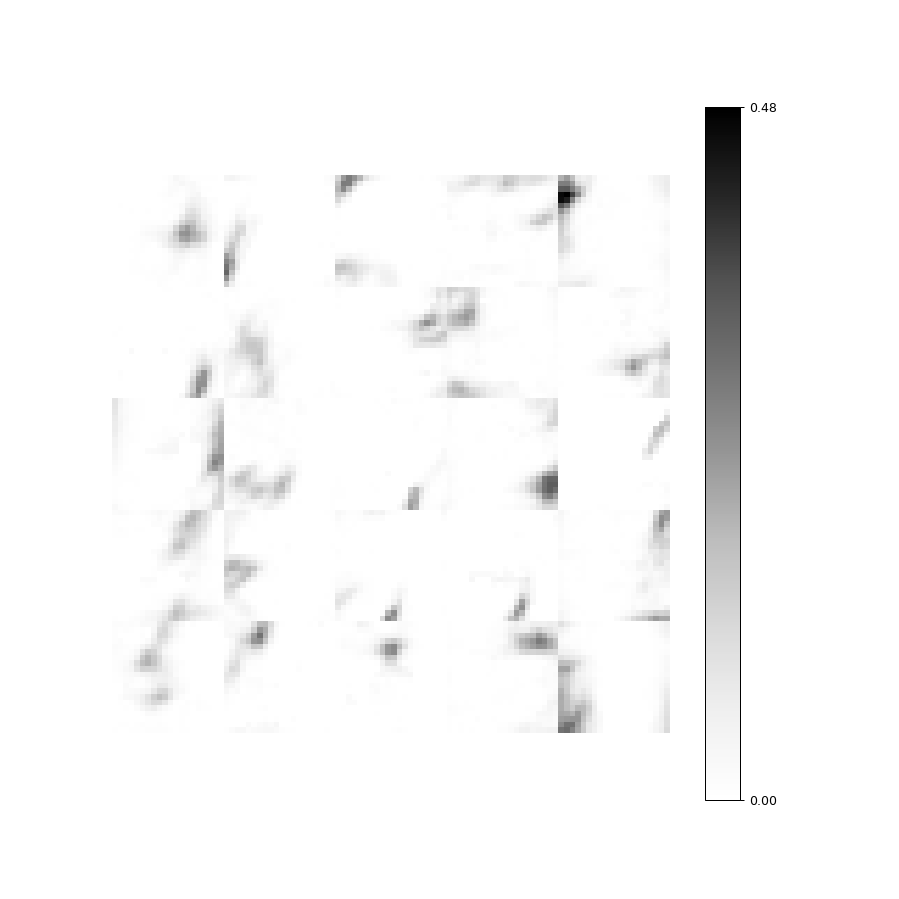

In [120]:
fig = plt.figure(figsize=(10, 10))

draw_weights((iw @ sw).get(), Ix, Iy, 20, fig)

Hmm.  Very interesting.  So I should probably increase the number of invariant neurons linearly with the number of sparse neurons. 

Ok, time to close this down.

## Conclusions

This was actually pretty encouraging.  Training the invariant neurons in the collaborative fashion was incredibly beneficial for helping them zero in on different, related sparse features.  

Using the ema was good because it basically ensured that the invariant neurons are picking up on related features.  

So yeah, I'd say this experiment was a success!

## Next steps

I need to come up with a simpler dataset on which to train the neurons.  I'm thinking a ribbon, where the digits are passed in front of the screen left to right with a constant velocity.  I think that should hopefully allow me to have a better understanding of what the invariant layer is actually doing.